In [2]:
!pip install plotly
!pip install numpy
!pip install matplotlib
!pip install statsmodels
!pip install pandas
!pip install sklearn
!pip install seaborn
!pip install yellowbrick
!pip install scipy

In [2]:
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import random
import matplotlib.pyplot as plt
import numpy as np
import csv
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

In [24]:
import math

# Analisis exploratorio
# ESTO FALTA 
Hay que hacer analisis exploratorio y ver correlacion


In [3]:
#We get only relevant columns
trainSetGiven = pd.read_csv("data/train.csv")[["SalePrice","LotFrontage","GarageArea","GrLivArea","LotArea","YearRemodAdd", "OverallQual"]]
trainSetGiven.columns

Index(['SalePrice', 'LotFrontage', 'GarageArea', 'GrLivArea', 'LotArea',
       'YearRemodAdd', 'OverallQual'],
      dtype='object')

In [4]:
#Get only numeric
dataSetCompleteNumeric = trainSetGiven._get_numeric_data().dropna(how='any')
lenP = len(dataSetCompleteNumeric['SalePrice'])

dataSetCompleteNumeric

,SalePrice,LotFrontage,GarageArea,GrLivArea,LotArea,YearRemodAdd,OverallQual
0,208500,65.0,548,1710,8450,2003,7
1,181500,80.0,460,1262,9600,1976,6
2,223500,68.0,608,1786,11250,2002,7
3,140000,60.0,642,1717,9550,1970,7
4,250000,84.0,836,2198,14260,2000,8
...,...,...,...,...,...,...,...
1455,175000,62.0,460,1647,7917,2000,6
1456,210000,85.0,500,2073,13175,1988,6
1457,266500,66.0,252,2340,9042,2006,7
1458,142125,68.0,240,1078,9717,1996,5


# Pre procesamiento
Decidimos separar las casas en subconjuntos para determinar su variable categórica que sera la que luego pasaremos a que nos funcione como un factor

In [5]:
# We sperate to get valid sets
caros = dataSetCompleteNumeric[dataSetCompleteNumeric['SalePrice']>150000].copy()
# caros['cat'] = 'Caro'
caros['category'] = "cara"
baratos = dataSetCompleteNumeric[dataSetCompleteNumeric['SalePrice']<80000].copy()
baratos['category'] = "barata"
medio = dataSetCompleteNumeric[dataSetCompleteNumeric['SalePrice'] > 80000].copy()
medio = medio[medio['SalePrice'] < 150000]
medio['category'] = "medio"
medio["category"]

3       medio
5       medio
8       medio
9       medio
10      medio
        ...  
1450    medio
1452    medio
1453    medio
1458    medio
1459    medio
Name: category, Length: 494, dtype: object

In [28]:
#Proporciones caros
trainCaro = caros.sample(frac=0.7)
normalizeC = caros.drop(trainCaro.index)

#Proporciones baratos
trainBarato = baratos.sample(frac=0.7)
normalizeB = baratos.drop(trainBarato.index)

#Proporciones medio
trainMedio = medio.sample(frac=0.7)
normalizeM = medio.drop(trainMedio.index)

# Proporcion 30, 70
normalized  = normalizeC.append(normalizeB).append(normalizeM)

#all data
datos = normalized
datosSalePrice = normalized.copy()
# datosSalePrice.pop

# datos.pop("SalePrice")
# y = datos.pop("category")
# X = datos 
y = datos.pop("SalePrice")
datos.pop("category")
X = datos
y.unique()

array([230000, 256300, 277500, 309000, 160000, 249700, 202500, 193500,
       204750, 250000, 163990, 181000, 171000, 260000, 254900, 220000,
       183500, 215000, 239000, 163000, 184000, 243000, 200100, 286000,
       235000, 274900, 210000, 386250, 192500, 262500, 231500, 176000,
       241500, 201000, 415298, 159000, 157000, 225000, 324000, 192000,
       377426, 155000, 202900, 437154, 165000, 219500, 187750, 191000,
       169500, 241000, 164990, 195400, 175500, 167000, 187000, 440000,
       326000, 164900, 184750, 315750, 315000, 179665, 263000, 284000,
       325000, 214000, 224500, 170000, 253293, 151000, 275000, 221000,
       205000, 152000, 165150, 168500, 209500, 200000, 264561, 205950,
       402000, 755000, 312500, 189000, 320000, 222500, 265979, 275500,
       215200, 264132, 395000, 162000, 221500, 160200, 224900, 232600,
       166000, 174900, 240000, 174000, 189950, 248900, 236000, 303477,
       187500, 328900, 154500, 611657, 153000, 180000, 255000, 173733,
      

Arriba lo que hicimos fue solo tomar el 30 de los datos de cada una de las diferentes categorias asi teniamos una muestra pareja para un mejor modelo.

In [75]:
#Plot config
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')


# Primer Red neuronal Relu para vairable categorica
Procederemos a crear nuestro set de testing y de training para el modelo

In [11]:
#Set seeder for random
random.seed(456)

In [32]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

# Normalizaremos los datos

In [33]:
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Entrenando el modelo
- Hidden layer sizes = 11,7
- Numero maximo de iteraciones 10k

Lo que estamos haceindo es definir un modelo con 11 layers para nuestra red neuronal y 7 nodos cada uno una tupla en el iesimo elemento.
Le definiremos un random state para que siempre nos de el mismo resultado con estas condiciones y este data set y como metodo de activacion usamos adam.
Por ultimo definimos que maximo numero de iteraciones sera 10k.
### Acerca de nuestro metodo de activacion
`Relu`

‘relu’, the rectified linear unit function, returns f(x) = max(0, x).<br>
Podemos observar que tiene un comportamiento lineal y retorna nada mas el maximo que es x.

In [10]:
import time
mlp1 = MLPClassifier(hidden_layer_sizes=(11,7), max_iter=10000, activation = 'relu',random_state=1)
timestamp1 = time.time()
mlp1.fit(X_train,y_train)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en entrenar con un kernel linear" % (timestamp2 - timestamp1))

Se tomo  2.99 segundos en entrenar con un kernel linear


## Realizando predicciones

In [26]:
timestamp1 = time.time()
y_pred = mlp1.predict(X_test)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en predecir" % (timestamp2 - timestamp1))

cm = confusion_matrix(y_test,y_pred)

accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para svm con kernel linear\n',cm)
print('Accuracy: ',accuracy * 100,"%")
print('Precision: ',precision * 100,"%")
print('Sensibilidad al true rating dentro de nuestra matriz: ',recall * 100 , "%")
y_pred

Se tomo  0.00 segundos en predecir
Matriz de confusión para svm con kernel linear
 [[ 1  0  3]
 [ 0 51  6]
 [ 1 10 36]]
Accuracy:  81.48148148148148 %
Precision:  81.48148148148148 %
Sensibilidad al true rating dentro de nuestra matriz:  81.48148148148148 %


array(['cara', 'cara', 'medio', 'cara', 'cara', 'cara', 'cara', 'cara',
       'cara', 'cara', 'cara', 'cara', 'medio', 'medio', 'medio', 'medio',
       'cara', 'medio', 'cara', 'medio', 'medio', 'medio', 'medio',
       'cara', 'cara', 'cara', 'medio', 'cara', 'medio', 'medio', 'medio',
       'medio', 'cara', 'cara', 'cara', 'medio', 'cara', 'medio', 'cara',
       'medio', 'medio', 'cara', 'medio', 'cara', 'cara', 'cara', 'cara',
       'cara', 'medio', 'medio', 'cara', 'cara', 'medio', 'cara', 'cara',
       'cara', 'medio', 'medio', 'medio', 'cara', 'cara', 'cara', 'medio',
       'cara', 'medio', 'cara', 'cara', 'medio', 'cara', 'barata', 'cara',
       'cara', 'cara', 'cara', 'cara', 'medio', 'medio', 'medio', 'cara',
       'cara', 'cara', 'cara', 'cara', 'cara', 'medio', 'cara', 'medio',
       'cara', 'cara', 'medio', 'cara', 'medio', 'medio', 'medio',
       'medio', 'cara', 'barata', 'cara', 'medio', 'cara', 'medio',
       'medio', 'medio', 'cara', 'medio', 'cara', 'medio

# Resultados de la primer red Neuronal
Con este modelo tuvimos bastantes iteraciones como podemos ver 10k de iteraciones y el metodo de activacion fue `relu`
tuvimos buenos resultados nuestro porcentaje de precision fue del 81.48% ahora bien nos interesara ver si esto cambia al cambiar de funcion e incrementar los layers, numero de nodos e iteraciones. y como esto afectara nuestro perfomance.
Tambein observamos que fue un metodo eficiente no duro ni una centesima de segundo en predecir y en crear el modelo  tardo 1.43 segundos

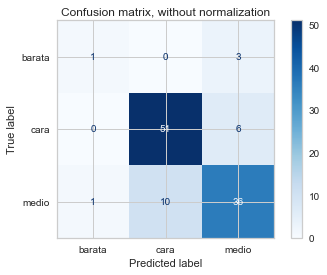

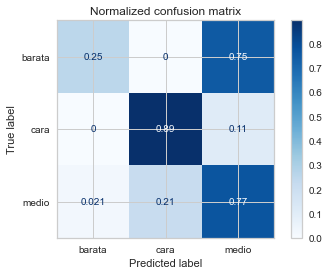

In [29]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(mlp1, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

# Interpretacion de las matrices de confusion
Viendo la matriz de confusion normalizada podemos ver que en cuanto a porcentajes la variable de respuesta que mejor logro calcular fue las casas caras con un 89% de actierto unicamente confundiendolas con las medias en un 11%.
Seguido de esto vemos que las casas medias fueron las siguientes que mejor porcentaje de preisición tuvo con unn 77% esta si siendo confundida mas que todo con las casas caras en un 21% y en muy raras ocaciones fue confundida con las casas baratas en un 2% y por ultimo las casas baratas que fue la que peor le fue definitivamente nunca supo resolverlo con un 25% de acierto y siendo confundidas mas que todo con las casas medias pero que esto no nos alarme ya que viendo el otro heatmap de nuestra matriz de confusión podemos observar que la muestra fueron 4 casas baratas donde 3 se pensaron que eran medias erroneamente de hecho la mayor concentracion de nuestro data set de prediccion lo obsservamos en las casas caras que si fueron caras en las casas medias que si fueron medias y en las medias que se penso que eran caras.

# Segunda Red neuronal Tanh variable categorica
Procederemos a crear nuestro set de testing y de training para el modelo

# Entrenando el modelo
- Hidden layer sizes = 18,15
- Numero maximo de iteraciones 100k

Lo que estamos haceindo es definir un modelo con 18 layers para nuestra red neuronal y 15 nodos cada uno una tupla en el iesimo elemento.

Aca incrementemos tambien nuestro numero de iteraciones x10 y nuestro metodo de activacion sera La tangente hyperbolica de x "tanh"
### Acerca de nuestro metodo de activacion
`tanh`

‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
Nos gusto este approach ya que es completamente distinta la funcion de activacion a la pasada pudo haber sido esta o logistic que no sigue un comportamiento lineal.

In [32]:
mlp2 = MLPClassifier(hidden_layer_sizes=(18,15), max_iter=100000, activation = 'tanh',random_state=1)
timestamp1 = time.time()
mlp2.fit(X_train,y_train)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en entrenar con un kernel linear" % (timestamp2 - timestamp1))

Se tomo  1.42 segundos en entrenar con un kernel linear


## Realizando predicciones

In [33]:
timestamp1 = time.time()
y_pred = mlp2.predict(X_test)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en predecir" % (timestamp2 - timestamp1))

cm = confusion_matrix(y_test,y_pred)

accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para svm con kernel linear\n',cm)
print('Accuracy: ',accuracy * 100,"%")
print('Precision: ',precision * 100,"%")
print('Sensibilidad al true rating dentro de nuestra matriz: ',recall * 100 , "%")
y_pred

Se tomo  0.00 segundos en predecir
Matriz de confusión para svm con kernel linear
 [[ 1  0  3]
 [ 0 49  8]
 [ 1  7 39]]
Accuracy:  82.4074074074074 %
Precision:  82.4074074074074 %
Sensibilidad al true rating dentro de nuestra matriz:  82.4074074074074 %


array(['medio', 'cara', 'medio', 'cara', 'cara', 'cara', 'cara', 'cara',
       'cara', 'cara', 'cara', 'cara', 'medio', 'medio', 'medio', 'medio',
       'cara', 'medio', 'cara', 'medio', 'medio', 'medio', 'medio',
       'cara', 'cara', 'cara', 'medio', 'cara', 'medio', 'medio', 'medio',
       'medio', 'cara', 'medio', 'cara', 'medio', 'cara', 'cara', 'medio',
       'medio', 'medio', 'cara', 'medio', 'cara', 'cara', 'cara', 'cara',
       'cara', 'medio', 'medio', 'cara', 'cara', 'medio', 'cara', 'cara',
       'cara', 'medio', 'medio', 'medio', 'cara', 'cara', 'cara', 'medio',
       'cara', 'medio', 'cara', 'medio', 'medio', 'cara', 'barata',
       'cara', 'cara', 'cara', 'cara', 'cara', 'medio', 'medio', 'medio',
       'cara', 'cara', 'cara', 'medio', 'cara', 'cara', 'medio', 'cara',
       'medio', 'cara', 'cara', 'medio', 'cara', 'medio', 'medio',
       'medio', 'medio', 'cara', 'barata', 'cara', 'medio', 'cara',
       'medio', 'medio', 'medio', 'cara', 'medio', 'cara', 'm

# Resultados de la segunda red Neuronal
Con este modelo ademas de tener una topografia diferente con mas layers y mas nodos notamos y 10x de veces mas iteraciones notamos que no tardo mas tiempo en producir nuestro modelo, es mas en teoria fue 0.01 segundos mas rapido lo cual es despreciable pero llama la atencion estos resultados.
A diferencia de nuestro otro modelo podemos notar un incremento en un 1% de acierto lo cual tampoco es muy significativo y nos deja cuestionando si tuvieran la misma topografia si podrian rendir igual

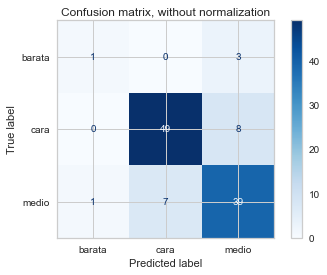

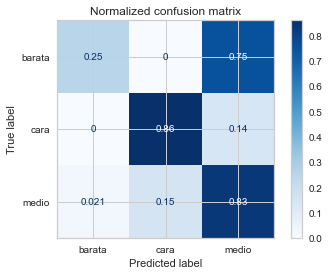

In [35]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(mlp2, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

# Interpretacion de las matrices de confusion
Lo primero que hablaremos y nos llama la atencion es que tuvo el mismo procentaje de error y con el el mismo tipo de casa cuando miramos las casas baratas esto lo vemos en nuestra matriz normalizada donde vemos que el 25% de las casas tuvo acierto y el 75% no y ese 75% fue con las casas medias.
En cuanto a primer segundo y tercer lugar de casas mejor clasificadas se llevan el mismo podio 
1. Las casas caras
2. Las casas medias
3. Las casas baratas
En lo que difiere este podio es que las casas medias tuvi un incremento relativamente fuerte en cuanto a su acierto de un 6% y las casas caras su aceierto bajo en un 3% dejando estas dos a un nivel de acierto mas parejo.

De nuevo las casas medias mas que todo fueron confundidas con las caras y casi no con las baratas pareciera que nuestro modelo en ambos casos siempre piensa que una casa barata es media. Y las casas caras unicamente fueron confundidas con las medias.

Estos resultados tan pobres en nuestro data set puede ser debido a la poca precencia de casas baratas en nuestro train set

# Redes neuronales con Sale Price
Aca usaremos la variable datosSalePrice

In [42]:
y_sale_price = datosSalePrice.pop("SalePrice")
X_sale_price = datosSalePrice 
#Creamos de nuevo nuestro test y train set
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

# Normalizacion de datos

In [43]:
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Red neuronal numero 1 con funcion de activacion 'identity'
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

## Entrenaremos el modelo

In [50]:
mlp1 = MLPClassifier(hidden_layer_sizes=(11,7), max_iter=10000, activation = 'identity',random_state=1)
timestamp1 = time.time()
mlp1.fit(X_train,y_train)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en entrenar con un kernel linear" % (timestamp2 - timestamp1))

Se tomo  3.42 segundos en entrenar con un kernel linear


## Realizando predicciones


In [52]:
timestamp1 = time.time()
y_pred = mlp1.predict(X_test)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en predecir" % (timestamp2 - timestamp1))

# cm = confusion_matrix(y_test,y_pred)

# accuracy=accuracy_score(y_test,y_pred)
# precision =precision_score(y_test, y_pred,average='micro')
# recall =  recall_score(y_test, y_pred,average='micro')
# f1 = f1_score(y_test,y_pred,average='micro')
# print('Matriz de confusión para svm con kernel linear\n',cm)
# print('Accuracy: ',accuracy * 100,"%")
# print('Precision: ',precision * 100,"%")
# print('Sensibilidad al true rating dentro de nuestra matriz: ',recall * 100 , "%")
y_pred

Se tomo  0.00 segundos en predecir


array([ 55000, 215200, 611657, 136000, 151000, 337500, 227000, 219500,
        91500,  90350, 120000, 256300, 140000, 148000, 176485, 256300,
       197000, 141000,  85400, 239000, 225000, 132000, 215000, 112000,
       248900, 119000, 119000, 155000, 222500, 155000, 137500, 173733,
       232600, 151000,  92900, 116000, 127000, 209500, 118000, 225000,
       142953, 193500, 136000, 145000, 116000, 284000, 120000, 177000,
       116000, 250000, 145500, 193500, 137500, 227000, 160000, 221500,
       325000,  86000, 140000, 127000,  87000, 215000, 152000, 113000,
        85400, 260000, 219500, 181000, 115000,  86000,  95000, 108000,
       239000, 179665,  87000, 215000, 169000, 155000,  91300, 240000,
       199900, 235128, 240000, 141000, 127000, 129900, 284000, 137500,
       116000, 155000, 123000, 225000, 146500, 180000, 145500, 180000,
       132500, 225000, 231500, 224900, 145500, 124000, 337500, 250000,
       192140, 240000, 235128, 146500], dtype=int64)

In [49]:
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

print("valor máximo: "+str(max(y_test)))
print("valor minimo: "+str(min(y_test)))

Root Mean Square Error:

62786.854888406204
valor máximo: 755000
valor minimo: 60000


# Resultados Sale Price con 'identity'
ACA HABLAREMOS DE LOS RESULTADOS

# Interpretacion de las matrices de confusion

# Red neuronal numero 2 con funcion de activacion 'logistic'
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

## Entrenaremos el modelo

In [39]:
mlp1 = MLPClassifier(hidden_layer_sizes=(11,7), max_iter=10000, activation = 'logistic',random_state=1)
timestamp1 = time.time()
mlp1.fit(X_train,y_train)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en entrenar con un kernel linear" % (timestamp2 - timestamp1))

Se tomo  14.66 segundos en entrenar con un kernel linear


## Realizando predicciones

In [46]:
timestamp1 = time.time()
y_pred = mlp1.predict(X_test)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en predecir" % (timestamp2 - timestamp1))

# cm = confusion_matrix(y_test,y_pred)

# accuracy=accuracy_score(y_test,y_pred)
# precision =precision_score(y_test, y_pred,average='micro')
# recall =  recall_score(y_test, y_pred,average='micro')
# f1 = f1_score(y_test,y_pred,average='micro')
# print('Matriz de confusión para svm con kernel linear\n',cm)
# print('Accuracy: ',accuracy * 100,"%")
# print('Precision: ',precision * 100,"%")
# print('Sensibilidad al true rating dentro de nuestra matriz: ',recall * 100 , "%")
y_pred

Se tomo  0.00 segundos en predecir


array([141000, 215000, 325000, 140000, 140000, 325000, 325000, 195400,
       141000, 140000, 127000, 242000, 145000, 140000, 173000, 325000,
       240000, 141000, 127000, 169000, 240000, 127000, 325000, 215000,
       325000, 141000, 127000, 140000, 197000, 140000, 141000, 140000,
       225000, 140000, 141000, 140000, 141000, 165400, 141000, 240000,
       181000, 187000, 140000, 145000, 145000, 325000, 140000, 140000,
       141000, 197000, 141000, 235000, 141000, 325000, 325000, 225000,
       325000, 141000, 145000, 141000, 141000, 215000, 189000, 141000,
       127000, 325000, 192140, 181000, 130000, 141000, 141000, 141000,
       143000, 325000, 141000, 225000, 187000, 140000, 141000, 325000,
       181000, 325000, 325000, 141000, 141000, 141000, 325000, 141000,
       127000, 140000, 141000, 240000, 140000, 160200, 140000, 187000,
       140000, 325000, 325000, 173000, 140000, 140000, 325000, 225000,
       141000, 325000, 325000, 145000], dtype=int64)

In [48]:
#Aca va lo de la confussion matrix calcularla y el accuracy, precision recall score
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

print("valor máximo: "+str(max(y_test)))
print("valor minimo: "+str(min(y_test)))

Root Mean Square Error:

62786.854888406204
valor máximo: 755000
valor minimo: 60000


## Resultados Sale Price con 'logistic'
ACA HABLAREMOS DE LOS RESULTADOS

# Interpretacion de las matrices de confusion

# Resumen
TODO

# ¿Cuál es mejor para predecir?
TODO
# Cual se tardo mas?
TODO
